In [1]:
# Objective: test the "quality" of the reduction in the frequency space

%matplotlib notebook 
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize as imresize
import numpy as np
import scipy

In [2]:
# implement 2D DCT
def dct2(img):
    from scipy.fftpack import dct
    return dct(dct(img.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(img):
    from scipy.fftpack import idct
    return idct(idct(img.T, norm='ortho').T, norm='ortho')   

In [3]:
img_original = rgb2gray(imread('../test-media/cat.png'))
img_freq1 = dct2(img_original)
img_remade1 = idct2(img_freq1)
np.allclose(img_original, img_remade1)

True

<IPython.core.display.Javascript object>


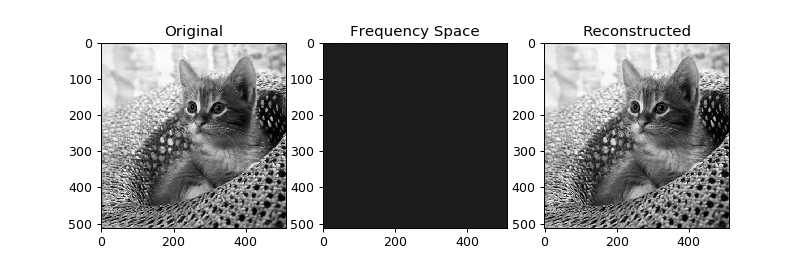

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.set_title('Original')
ax1.imshow(img_original, cmap='gist_gray')
ax2.set_title('Frequency Space')
ax2.imshow(img_freq1, cmap='gist_gray')
ax3.set_title('Reconstructed')
ax3.imshow(img_remade1, cmap='gist_gray')

<IPython.core.display.Javascript object>


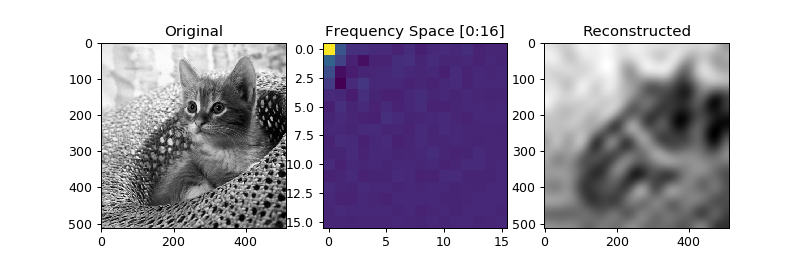

In [9]:
img_freq2 = np.zeros(img_freq1.shape)
detail = 16
img_freq2_significant = img_freq1[0:detail,0:detail].copy()
img_freq2[0:detail,0:detail] = img_freq2_significant
img_remade2 = idct2(img_freq2)
    

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.set_title('Original')
ax1.imshow(img_original, cmap='gist_gray')
ax2.set_title('Frequency Space [0:{}]'.format(detail))
ax2.imshow(img_freq2_significant)
ax3.set_title('Reconstructed')
ax3.imshow(img_remade2, cmap='gist_gray')

<IPython.core.display.Javascript object>


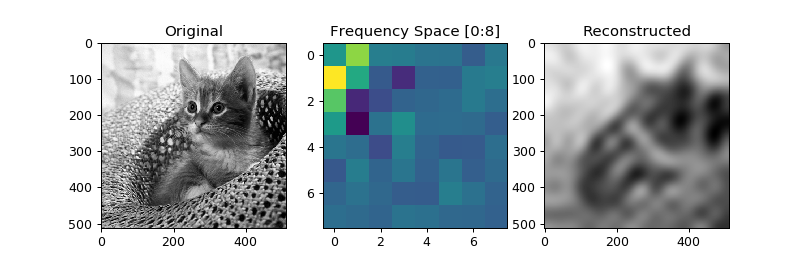

In [12]:
img_original = rgb2gray(imread('../test-media/cat.png'))
img_original -= 0.5
img_freq3 = dct2(img_original)

img_freq4 = np.zeros(img_freq1.shape)
detail = 816
img_freq4_significant = img_freq3[0:detail,0:detail]
img_freq4[0:detail,0:detail] = img_freq4_significant
img_remade4 = idct2(img_freq4)
    

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.set_title('Original')
ax1.imshow(img_original, cmap='gist_gray')
ax2.set_title('Frequency Space [0:{}]'.format(detail))
ax2.imshow(img_freq4_significant)
ax3.set_title('Reconstructed')
ax3.imshow(img_remade2, cmap='gist_gray')

#### Remark

It is pretty important to change the imput range to -0.5 to +0.5. This greatly assists with reducing the value of the upper left pixel.